In [1]:
from langgraph.graph import StateGraph ,START, END
from typing import TypedDict,Literal

In [2]:
class Quadstate(TypedDict):
    a: float
    b: float
    c: float
    discriminant: float
    equation: str
    result: str

In [18]:
def show_eq(state:Quadstate):
    equation=f"{state['a']}x^2 +{state['b']}x +{state['c']}"
    return {'equation':equation}

def calc_discriminant(state:Quadstate):
    d=state['b']**2 - 4*state['a']*state['c']
    return {'discriminant':d} 

def real_roots(state:Quadstate):
    d=state['discriminant']
    a=state['a']
    b=state['b']
    root1=(-b + d**0.5)/(2*a)
    root2=(-b - d**0.5)/(2*a)
    return {'result':f"Real roots: {root1}, {root2}"}

def complex_roots(state:Quadstate):
    d=state['discriminant']
    a=state['a']
    b=state['b']
    real_part = -b / (2 * a)
    imag_part = (-d)**0.5 / (2 * a)
    root1 = complex(real_part, imag_part)
    root2 = complex(real_part, -imag_part)
    return {'result':f"Complex roots: {root1}, {root2}"}

def repeated_root(state:Quadstate):
    a=state['a']
    b=state['b']
    root = -b / (2 * a)
    return {'result':f"Repeated root: {root}"}


def check_condition(state:Quadstate)->Literal["real_roots","complex_roots","repeated_root"]:
    d=state['discriminant']
    if d>0:
        return "real_roots"
    elif d<0:
        return "complex_roots"
    else:
        return "repeated_root"
  

In [19]:
graph=StateGraph(Quadstate)
graph.add_node('show_eq',show_eq)
graph.add_node('calc_discriminant',calc_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('complex_roots',complex_roots)
graph.add_node("repeated_root",repeated_root)



graph.add_edge(START,'show_eq')
graph.add_edge('show_eq','calc_discriminant')  

graph.add_conditional_edges('calc_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('complex_roots',END)
graph.add_edge('repeated_root',END)


workflow=graph.compile()

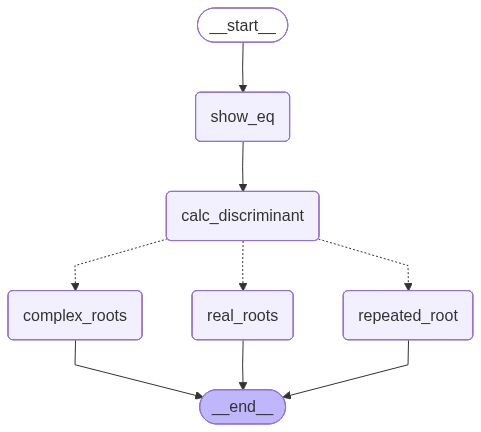

In [13]:
workflow

In [20]:
initial_state={'a':2,
               'b':4,
               'c':2}
workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'discriminant': 0,
 'equation': '2x^2 +4x +2',
 'result': 'Repeated root: -1.0'}